# Konstellasjon

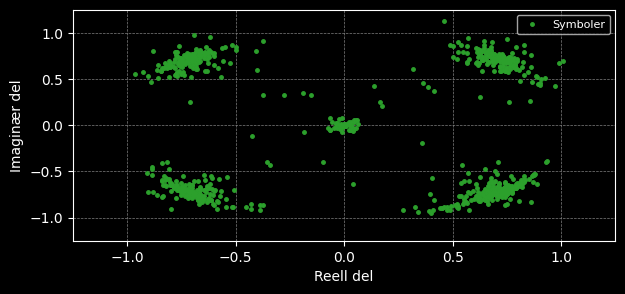

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Last inn kompleks data og plott eye diagram og konstellasjon
file_path = 'SimData/RxSynced.bin'
data = np.fromfile(file_path, dtype=np.complex64)

samp_rate = 480e3
samples_per_symbol = 1

plt.figure(figsize=(7, 3)) # axs[0] = konstellasjonsdiagram, axs[1] = 3d probability density plot
plt.plot(np.real(data), np.imag(data), 'o', markersize=2.5, color='tab:green')
plt.xlabel('Reell del')
plt.ylabel('Imaginær del')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25, 1.25)
plt.xticks(np.arange(-1, 1.5, 0.5))
plt.yticks(np.arange(-1, 1.5, 0.5))
plt.legend(['Symboler'], loc='upper right', fontsize=8)
plt.savefig('Figurer/Rx_konst.pdf', bbox_inches='tight')
plt.show()

# Eye-diagram

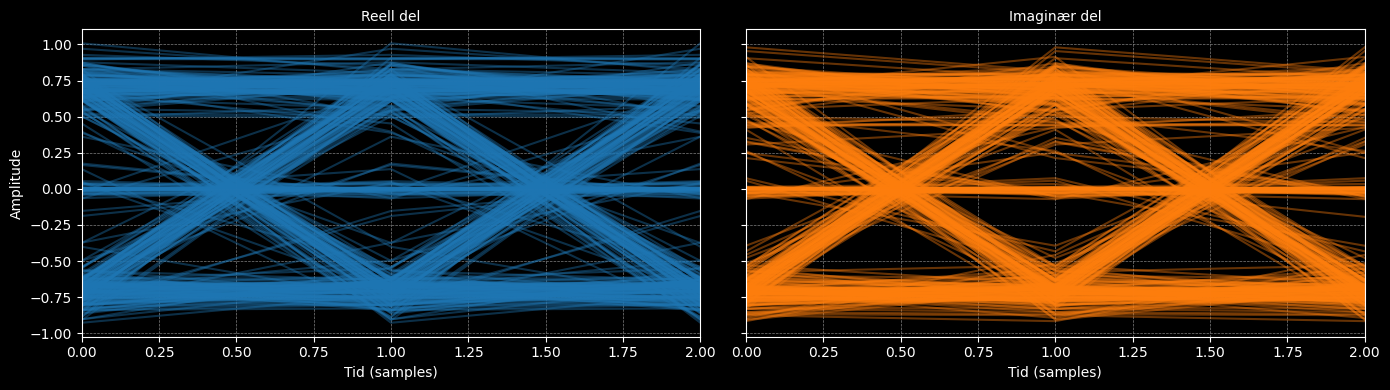

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Last inn kompleks data og plott eye diagram og konstellasjon
file_path = 'SimData/RxSynced.bin'
data = np.fromfile(file_path, dtype=np.complex64)

samp_rate = 480e3
samples_per_symbol = 1
eye_periods = 3
def plot_eye_diagram(signal, samples_per_symbol, eye_periods=2, num_traces=200):
    """
    Plotter eye-diagram fra et kompleks signal i to subplots:
    én for realdelen og én for imaginærdelen.
    """
    real_signal = np.real(signal)
    imag_signal = np.imag(signal)
    eye_length = samples_per_symbol * eye_periods
    max_offset = len(signal) - eye_length

    fig, axs = plt.subplots(1, 2, figsize=(14, 4),sharey=True)
    for i in range(min(num_traces, max_offset // samples_per_symbol)):
        start = i * samples_per_symbol
        r_segment = real_signal[start:start + eye_length]
        j_segment = imag_signal[start:start + eye_length]

        if len(r_segment) == eye_length:
            axs[0].plot(r_segment, color='tab:blue', alpha=0.4)
            axs[1].plot(j_segment, color='tab:orange', alpha=0.4)

    axs[0].set_title("Reell del (I)", fontsize=10)
    axs[1].set_title("Imaginær del (Q)", fontsize=10)
    axs[0].set_xlabel("Tid (samples)")
    axs[1].set_xlabel("Tid (samples)")
    axs[0].set_ylabel("Amplitude")

    for ax in axs:
        ax.grid(color='gray', linestyle='--', linewidth=0.5)
        ax.set_xlim(0, eye_length-1)

    plt.tight_layout()
    plt.savefig('Figurer/Rx_eye.pdf', bbox_inches='tight')
    plt.show()

# Plot eye-diagram for real og imaginær del
plot_eye_diagram(data, samples_per_symbol, eye_periods=eye_periods, num_traces=len(data)//2)